In [1]:
#import basic library
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to load dataset
df=pd.read_csv("/content/drive/MyDrive/AWP & ML/csv file/creditcard.csv")

In [3]:
#to show first 5 records
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#show columns in dataframe df
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
#drop unwanted column permanently
df.drop(['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'],axis=1,inplace=True)

In [6]:
#to show firstb three records
df.head(3)

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0


In [ ]:
#To show null values
df.isnull().sum()

Time      0
Amount    0
Class     0
dtype: int64

In [ ]:
#cross check
df.dtypes

Time      float64
Amount    float64
Class       int64
dtype: object

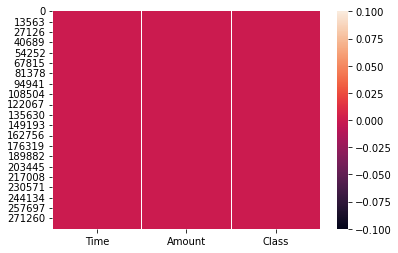

In [ ]:
#visualise null values
sb.heatmap(df.isnull())
plt.show()

In [7]:
#select input and output
x=df.drop("Class",axis=1)  #input
y=df["Class"]   #output

In [8]:
#train test split 70% - 30% 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [9]:
#no. of rows and column in training data
x_train.shape,y_train.shape

((199364, 2), (199364,))

In [10]:
#no. of rows and column in testing data
x_test.shape,y_test.shape

((85443, 2), (85443,))

In [11]:
#apply StandardScaler on x_train and x_test
from sklearn.preprocessing import StandardScaler
#create object of StandardScaler class
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [12]:
#first check y_train(0 and 1): how many smples of 0 and 1
y_train.value_counts()

0    199007
1       357
Name: Class, dtype: int64

In [13]:
from imblearn.over_sampling import RandomOverSampler
#RandomOverSampler inbuilt class which define in outer class over_sampling
#and over_sampling class define in inbuilt package imblearn

In [14]:
#create object RandomOverSampler class
ros=RandomOverSampler(random_state=1)
x_train1,y_train1=ros.fit_resample(x_train,y_train)
#fit_resample() inbuilt method of RandomOverSampler class

In [15]:
#check y_train1(0 and 1): how many smples of 0 and 1
y_train1.value_counts()

0    199007
1    199007
Name: Class, dtype: int64

In [16]:
#check testing data
x_test.shape,y_test.shape

((85443, 2), (85443,))

In [17]:
#check y_test(0 and 1): how many smples of 0 and 1
y_test.value_counts()

0    85308
1      135
Name: Class, dtype: int64

In [18]:
#apply RandomOverSampler on testing data
x_test1,y_test1=ros.fit_resample(x_test,y_test)

In [19]:
#check y_test1(0 and 1): how many smples of 0 and 1
y_test1.value_counts()

0    85308
1    85308
Name: Class, dtype: int64

In [20]:
#perform model with neural network (ANN : Artificial Neural Network)
#call library tensorflow 
import tensorflow as tf
#create object of Sequential class
model=tf.keras.Sequential([
    #first hidden layer   
    tf.keras.layers.Dense(units=64,activation='relu',input_shape=(x.shape[1],)),
    #second hidden layer
    tf.keras.layers.Dense(units=32,activation='relu'),
    #third hidden layer
    tf.keras.layers.Dense(units=16,activation='relu'),
    #Fourth hidden layer
    tf.keras.layers.Dense(units=8,activation='relu'),

    #output layer   
    tf.keras.layers.Dense(units=1,activation="sigmoid") 
    #if no mension activation then itself assign linear 
])
#output y=1/(1+np.exp(-x))
#loss binary_crossentropy ==> -p*log(p)-(1-p)*log(1-p)

In [21]:
#To show the summary of model
#use inbuilt method summary()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) 
#accuracy means accuracy score
#loss binary_crossentropy ==> -p*log(p)-(1-p)*log(1-p)

In [23]:
#crete a procedure for early stopping
#call inbuilt class: EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
#create object of EarlyStopping class
cb=EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [24]:
#train the model : use inbuilt method fit() of Sequential class 
#train the model with 70% data 
trained_model=model.fit(x_train1,y_train1,epochs=5000,batch_size=64,validation_data=(x_test1,y_test1),callbacks=cb)

Epoch 1/5000
6219/6219 [==============================] - 12s 2ms/step - loss: 0.5778 - accuracy: 0.6949 - val_loss: 0.6725 - val_accuracy: 0.6619
Epoch 2/5000
6219/6219 [==============================] - 12s 2ms/step - loss: 0.5175 - accuracy: 0.7454 - val_loss: 0.7499 - val_accuracy: 0.6613
Epoch 3/5000
6219/6219 [==============================] - 14s 2ms/step - loss: 0.4984 - accuracy: 0.7561 - val_loss: 0.8133 - val_accuracy: 0.6713
Epoch 4/5000
6219/6219 [==============================] - 11s 2ms/step - loss: 0.4868 - accuracy: 0.7604 - val_loss: 1.0268 - val_accuracy: 0.6646
Epoch 5/5000
6219/6219 [==============================] - 11s 2ms/step - loss: 0.4751 - accuracy: 0.7645 - val_loss: 1.0173 - val_accuracy: 0.6590
Epoch 6/5000
6219/6219 [==============================] - 11s 2ms/step - loss: 0.4649 - accuracy: 0.7697 - val_loss: 1.1730 - val_accuracy: 0.6680
Epoch 7/5000
6219/6219 [==============================] - 11s 2ms/step - loss: 0.4561 - accuracy: 0.7754 - val_loss: 1

In [25]:
model.get_weights()
#get_weights() inbuilt function

[array([[ 1.63353592e-01, -3.62996787e-01, -1.59883514e-01,
         -3.37086841e-02,  3.23648751e-01, -4.85907309e-02,
          1.09182703e+00, -7.85435319e-01, -4.54914600e-01,
          8.54801200e-03,  3.54884602e-02, -3.97958070e-01,
         -5.27562872e-02, -1.12739116e-01, -3.18218432e-02,
         -5.80811799e-01,  1.54192805e-01, -4.42814797e-01,
          7.55276263e-01, -4.40442681e-01,  4.62998683e-03,
         -1.99269000e-02, -4.56399381e-01, -4.21710104e-01,
         -4.34668660e-01, -1.89210355e-01, -1.52001485e-01,
         -5.21207333e-01, -7.13799655e-01,  4.25435811e-01,
          3.34934920e-01,  2.12094828e-01, -5.30362189e-01,
          8.12139809e-02, -6.52554452e-01, -2.84257442e-01,
          4.01167758e-03, -4.64691728e-01,  5.36373079e-01,
         -3.40682507e-01,  3.18968505e-01,  3.12718339e-02,
          1.85355044e-03,  1.48624938e-03, -3.03520888e-01,
          5.01086771e-01, -5.73645830e-01, -2.98066854e-01,
         -4.02235687e-01, -2.23777490e-0

In [26]:
#model evaluation:
print("Training Loss and accuracy :",model.evaluate(x_train1,y_train1))
print("Testing Loss and accuracy :",model.evaluate(x_test1,y_test1))

12438/12438 [==============================] - 14s 1ms/step - loss: 0.3779 - accuracy: 0.8159
Training Loss and accuracy : [0.37794229388237, 0.8158557415008545]
5332/5332 [==============================] - 5s 993us/step - loss: 3.7884 - accuracy: 0.6481
Testing Loss and accuracy : [3.788419723510742, 0.6480576395988464]


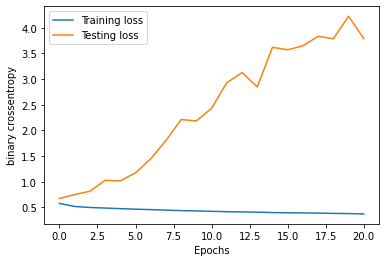

In [27]:
#visalisation to loss 
plt.plot(trained_model.history['loss'],label="Training loss")
plt.plot(trained_model.history['val_loss'],label="Testing loss")
plt.xlabel("Epochs")
plt.ylabel("binary crossentropy")
plt.legend()
plt.show()

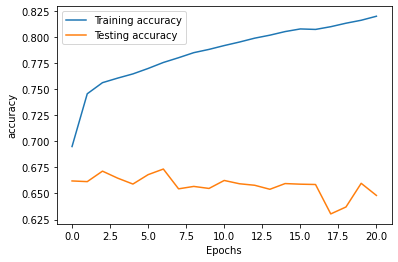

In [28]:
#visalisation to accuracy 
plt.plot(trained_model.history['accuracy'],label="Training accuracy")
plt.plot(trained_model.history['val_accuracy'],label="Testing accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [30]:
#Apply regularisation: L2 means Ridge Regularisation
#when model is overfitting
from tensorflow.keras import regularizers
model1=tf.keras.Sequential([
    #first hidden layer   
    tf.keras.layers.Dense(units=64,activation='relu',kernel_regularizer=regularizers.l2(0.01),input_shape=(x.shape[1],)),
    #second hidden layer
    tf.keras.layers.Dense(units=32,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    #Third hidden layer
    tf.keras.layers.Dense(units=16,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    #Fourth hidden layer
    tf.keras.layers.Dense(units=8,activation='relu',kernel_regularizer=regularizers.l2(0.01)),

    #output layer   
    tf.keras.layers.Dense(units=1,activation="sigmoid",kernel_regularizer=regularizers.l2(0.01)) 
    #if no mension activation then itself assign linear 
])

In [31]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) 
#accuracy means accuracy score

In [32]:
#train the model : use inbuilt method fit() of Sequential class 
#train the model with 70% data 
trained_model1=model1.fit(x_train1,y_train1,epochs=5000,batch_size=64,validation_data=(x_test1,y_test1),callbacks=cb)

Epoch 1/5000
6219/6219 [==============================] - 12s 2ms/step - loss: 0.7067 - accuracy: 0.5049 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5000
6219/6219 [==============================] - 12s 2ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5000
6219/6219 [==============================] - 14s 2ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5000
6219/6219 [==============================] - 11s 2ms/step - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5000
6219/6219 [==============================] - 12s 2ms/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/5000
6219/6219 [==============================] - 14s 2ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/5000
6219/6219 [==============================] - 12s 2ms/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0

In [34]:
model1.get_weights()
#get_weights() inbuilt function

[array([[-2.0982923e-34, -1.7962031e-34, -3.6507282e-34,  1.5571744e-34,
          2.0925331e-34,  4.6255023e-34,  4.2367957e-34,  1.8834289e-34,
         -2.0599216e-34,  2.5130233e-34, -1.1781805e-34,  1.3918328e-34,
          3.9362209e-34, -8.7023867e-35, -4.3354831e-34, -5.6868984e-34,
         -9.1528306e-35,  5.0149969e-34, -3.8904331e-34, -4.3846550e-34,
         -3.8621565e-34,  4.2316621e-34, -5.6681089e-34, -1.0550133e-34,
         -2.0354879e-36,  4.6930818e-34,  1.0160918e-34, -4.8606223e-34,
         -2.6326013e-34, -1.7293028e-34, -1.8602552e-34, -5.2826110e-34,
         -4.5121080e-34, -1.3286907e-34, -5.7794116e-34,  3.6610202e-34,
          2.2444274e-34, -1.0233128e-34,  2.2993161e-34, -4.6796145e-34,
          5.3183570e-34,  3.3603710e-34, -1.7582498e-34, -2.1804373e-34,
          1.8802813e-34, -2.1112044e-34,  3.6233677e-34,  4.5482347e-34,
         -4.2708552e-34,  1.7690809e-34, -1.1375125e-34,  2.4426876e-34,
          2.2662649e-34,  1.3885966e-34,  3.5058963

In [35]:
#model evaluation:
print("Training Loss and accuracy :",model1.evaluate(x_train1,y_train1))
print("Testing Loss and accuracy :",model1.evaluate(x_test1,y_test1))

12438/12438 [==============================] - 13s 1ms/step - loss: 0.6931 - accuracy: 0.5000
Training Loss and accuracy : [0.6930544376373291, 0.5]
5332/5332 [==============================] - 6s 1ms/step - loss: 0.6932 - accuracy: 0.5000
Testing Loss and accuracy : [0.6931762099266052, 0.5]


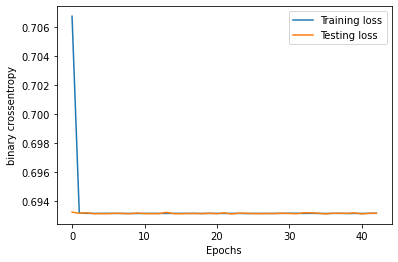

In [36]:
#visalisation to loss 
plt.plot(trained_model1.history['loss'],label="Training loss")
plt.plot(trained_model1.history['val_loss'],label="Testing loss")
plt.xlabel("Epochs")
plt.ylabel("binary crossentropy")
plt.legend()
plt.show()

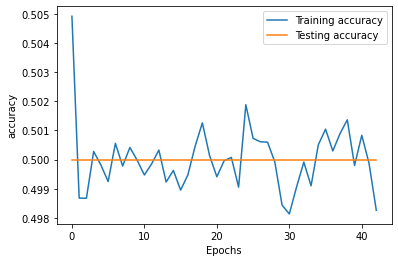

In [37]:
#visalisation to accuracy 
plt.plot(trained_model1.history['accuracy'],label="Training accuracy")
plt.plot(trained_model1.history['val_accuracy'],label="Testing accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [51]:
#using Dropout
from tensorflow.keras.layers import Dropout
model2=tf.keras.Sequential([
    #first hidden layer   parameter=7*8+8=56+8=64
    tf.keras.layers.Dense(units=64,activation='relu',kernel_regularizer=regularizers.l2(0.01),input_shape=(x.shape[1],)),Dropout(0.30),
    #second hidden layer
    tf.keras.layers.Dense(units=32,activation='relu',kernel_regularizer=regularizers.l2(0.01)),Dropout(0.25),
    tf.keras.layers.Dense(units=16,activation='relu',kernel_regularizer=regularizers.l2(0.01)),Dropout(0.30),
    
    #output layer   
    tf.keras.layers.Dense(units=1,activation="sigmoid",kernel_regularizer=regularizers.l2(0.01)) 
    #if no mension activation then itself assign linear 
])

In [52]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) 
#accuracy means accuracy score

In [53]:
#train the model : use inbuilt method fit() of Sequential class 
#train the model with 70% data 
trained_model2=model2.fit(x_train1,y_train1,epochs=5000,batch_size=64,validation_data=(x_test1,y_test1),callbacks=cb)

Epoch 1/5000
6219/6219 [==============================] - 12s 2ms/step - loss: 0.7060 - accuracy: 0.5056 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5000
6219/6219 [==============================] - 12s 2ms/step - loss: 0.6932 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5000
6219/6219 [==============================] - 14s 2ms/step - loss: 0.6932 - accuracy: 0.5008 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5000
6219/6219 [==============================] - 12s 2ms/step - loss: 0.6932 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5000
6219/6219 [==============================] - 12s 2ms/step - loss: 0.6932 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/5000
6219/6219 [==============================] - 12s 2ms/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/5000
6219/6219 [==============================] - 12s 2ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0

In [54]:
#model evaluation:
print("Training Loss and accuracy :",model2.evaluate(x_train1,y_train1))
print("Testing Loss and accuracy :",model2.evaluate(x_test1,y_test1))

12438/12438 [==============================] - 13s 1ms/step - loss: 0.6931 - accuracy: 0.5000
Training Loss and accuracy : [0.6930935382843018, 0.5]
5332/5332 [==============================] - 5s 1ms/step - loss: 0.6932 - accuracy: 0.5000
Testing Loss and accuracy : [0.693186342716217, 0.5]


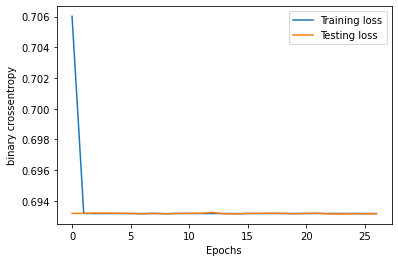

In [55]:
#visalisation to loss 
plt.plot(trained_model2.history['loss'],label="Training loss")
plt.plot(trained_model2.history['val_loss'],label="Testing loss")
plt.xlabel("Epochs")
plt.ylabel("binary crossentropy")
plt.legend()
plt.show()

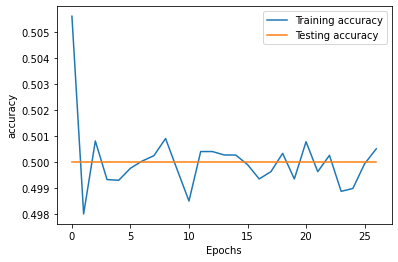

In [56]:
#visalisation to accuracy 
plt.plot(trained_model2.history['accuracy'],label="Training accuracy")
plt.plot(trained_model2.history['val_accuracy'],label="Testing accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [57]:
#find the prediction means test the model with 30% data
y_pred=model2.predict(x_test1).round(2)   #y_pred=1/(1+np.exp(-x_test))           
#return value of probability

5332/5332 [==============================] - 5s 852us/step


In [58]:
y_pred

array([[0.5],
       [0.5],
       [0.5],
       ...,
       [0.5],
       [0.5],
       [0.5]], dtype=float32)

In [59]:
#select index of highest probability class
#use list comprehension
y_pred=np.where(y_pred>=0.5,1,0)
y_pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [60]:
#generate classification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test1,y_pred))
print(confusion_matrix(y_test1,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     85308
           1       0.50      1.00      0.67     85308

    accuracy                           0.50    170616
   macro avg       0.25      0.50      0.33    170616
weighted avg       0.25      0.50      0.33    170616

[[    0 85308]
 [    0 85308]]
